# Testing hypotheses

**date** : 2021-04-17

**aim:** Perform an hypothesis test

**reference** : M248, computer book B, chapter 7

**packages:** `statsmodels`, `scipy`

## 1. Setup

In [1]:
# load the libraries
from setup import load
from statsmodels.stats.weightstats import ztest, zconfint
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
from scipy.stats import probplot, ttest_1samp, ttest_rel
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()

## 2. The $z$-test

**aim** : Test the hypotheses $H_{0} : \mu = 47.1\%, \> H_{1} : \mu \neq 47.1\%$, where $\mu$ is the mean total pass rate for the driving practical test nationally across all UK test centres during the period April 2014 to March 2015.

**reference** : activity 23

**data** : practical-test.csv

**description** : Pass rates for 316 UK driving practical test centres over the period April 2014 to March 2015.

### 2.1 Import the data

In [3]:
# load data, assign column to local var
rt = load.practical_test()["Total"]

### 2.2 Visualise the data

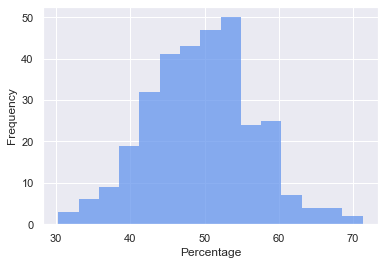

In [4]:
ax = sns.histplot(x=rt, edgecolor="none", color="cornflowerblue")
ax.set(xlabel="Percentage", ylabel="Frequency")
plt.show()

### 2.3 Perform the $z$-test

In [5]:
# get the z-interval
zconfint(x1=rt)

(48.84034238139587, 50.42041711227502)

Note that the `ztest()` returns `(test_statistic, p_value)`.

In [6]:
# perform the z-test
ztest(x1=rt, value=47.1)

(6.277491911091587, 3.440781584872767e-10)

Given $p <$ 0.01, there is strong evidence against the null hypothesis.
The data suggests that the mean total pass rate from April 2013 to March 2014 was not equal to that from April 2012 to March 2013.
Furthermore, with $Z > 0$, there is strong evidence to indicate that the mean total pass rate was greater from April 2013 to March 2014 compared to April 2012 to March 2013.

## 3. The paired $t$-test

**aims** : First, test the hypothesis $H_{0} : \mu_{D} = 0, \> \mu_{D} > 0$, where $\mu_{D}$ is the underlying population mean difference between the heights of paired plants. (See description.)

Second, test the hypothesis $H_{0} : \mu_{X} = \mu_{S}, \> \mu_{X} > \mu_{S}$, where $\mu_{X}, \> \mu_{S}$ are the underlying population mean heights of the paired cross- and self-fertilised plants, respectivly. (See description.)

**reference** : activity 25

**data** : darwn.csv

**description** : Heights of fifteen pairs of plants of the species *Zea mays*.
Each plant had parents grown from the same seed, where one plant in each pair was the offspring of a cross-fertilisation, the other of a self-fertilisation.

### 3.1 Import the data

In [7]:
# import the data
darwin = load.darwin()

In [8]:
# assign diff to local var
d = darwin["Cross"] - darwin["Self"]  # calculate the difference

### 3.2 Visualise the data

#### 3.2.1 Visualise both data

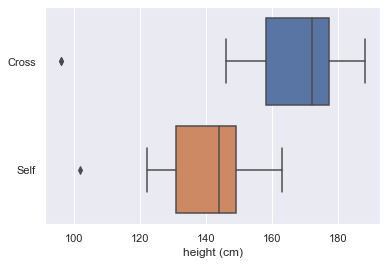

In [9]:
ax = sns.boxplot(data=darwin.melt(), x="value", y="variable")
ax.set(xlabel="height (cm)", ylabel="")
plt.show()

#### 3.2.2 Visualise the difference

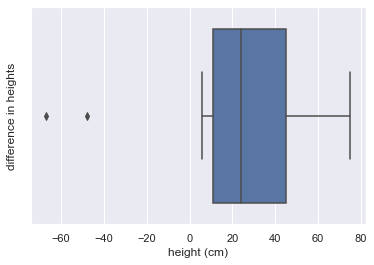

In [10]:
ax = sns.boxplot(x=d)
ax.set(xlabel="height (cm)", ylabel="difference in heights")
plt.show()

### 3.3 Perform the $t$-tests

#### 3.3.1 Check assumption of normality

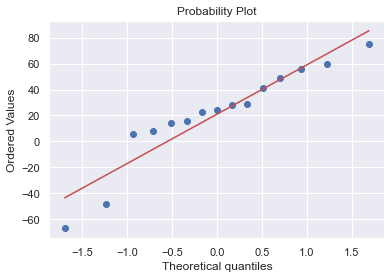

In [11]:
ax = plt.subplot()
probplot(x=d, plot=ax)
plt.show()

The points lie roughly along a straight-line.
This suggests a normal model is plausible for the difference
in heights between paired cross- and self-fertilised plants.

#### 3.3.2 Perform the $t$-test on the *difference*

Note that both `ttest_1samp()` returns `(test_statistic, p-value)`

In [12]:
ttest_1samp(a=d, popmean=0, alternative="greater")

Ttest_1sampResult(statistic=2.1479874613311205, pvalue=0.024851472010900447)

Given $p \in$ (0.01, 0.05], there is moderate to strong evidence against the null hypothesis.
We conclude that there is evidence to suggest that the mean difference in heights of the plants is greater than zero with cross-fertilised plants being taller on average than self-fertilised plants.

#### 3.3.3 Peform the $t$-test using *both data*

Note that both `ttest_rel()` returns `(test_statistic, p-value)`

In [13]:
# perform the test
ttest_rel(a=darwin["Cross"], b=darwin["Self"], alternative="greater")

Ttest_relResult(statistic=2.1479874613311205, pvalue=0.024851472010900447)

*(It is reassuring that this test gives the same result!)*

Given $p \in$ (0.01, 0.05], there is moderate to strong evidence against the null hypothesis.
The data indicates that there is moderate evidence in support of the claim that the mean height of the cross-fertilised plants is greater on average than self-fertilised plants.

## 4. Testing a proportion

**aim** : Test the hypothesis $H_{0} : p_{W} = 0.25, \> p_{W} \neq 0.25$, 
where the $p_{W}$ is the proportion of young adults from 20 to 34 years-old living with their parents in Wales in 2014. (See description.)

**reference** : activity 26

**data** : N/A

**description** : The Labour Force Survey (ONS, 2014) of 254 young people aged between 20 and 34 years living in Wales found that 68 were still living at home with their parents.
Previous surveys had found the same proportion to be one-in-four young adults still lived with their parents.

### 4.1 Perform the test of a proportion

In [15]:
# get the z-interval
proportion_confint(count=68, nobs=254)

(0.2132652113912282, 0.32216785947491355)

Note that `proportion_ztest()` returns `(test_statistic, p-value)`.

In [14]:
# perform the hypothesis test
proportions_ztest(
    count=68,
    nobs=254,
    value=0.25,
    prop_var=0.25)

(0.6520712004019975, 0.51435524178232)

Given that $p >$ 0.1, there is little to no evidence against the null hypothesis.